In [3]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv("HealthCareData.csv")  # Path should match your file location
df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [5]:
# Drop unnecessary columns
df.drop(columns=["S.NO"], inplace=True)

# Clean column names
df.columns = df.columns.str.strip().str.replace(" +", "", regex=True).str.replace("[^A-Za-z0-9]", "", regex=True)

# Show missing values
df.isnull().sum()

Age                                                              0
Gender                                                           0
Placelocationwherethepatientlives                              134
Durationofalcoholconsumptionyears                                0
Quantityofalcoholconsumptionquartersday                          0
Typeofalcoholconsumed                                            0
HepatitisBinfection                                              0
HepatitisCinfection                                              0
DiabetesResult                                                   0
Bloodpressuremmhg                                                0
Obesity                                                          0
Familyhistoryofcirrhosishereditary                               0
TCH                                                            359
TG                                                             359
LDL                                                           

In [9]:
threshold = 0.5  # 50%
df = df.loc[:, df.isnull().mean() < threshold]

In [11]:
df.columns


Index(['Age', 'Gender', 'Placelocationwherethepatientlives',
       'Durationofalcoholconsumptionyears',
       'Quantityofalcoholconsumptionquartersday', 'Typeofalcoholconsumed',
       'HepatitisBinfection', 'HepatitisCinfection', 'DiabetesResult',
       'Bloodpressuremmhg', 'Obesity', 'Familyhistoryofcirrhosishereditary',
       'TCH', 'TG', 'LDL', 'HDL', 'Hemoglobingdl', 'PCV', 'MCVfemtoliterscell',
       'TotalCount', 'Polymorphs', 'Lymphocytes', 'Monocytes', 'Eosinophils',
       'Basophils', 'PlateletCountlakhsmm', 'TotalBilirubinmgdl', 'Directmgdl',
       'Indirectmgdl', 'TotalProteingdl', 'Albumingdl', 'Globulingdl',
       'AGRatio', 'ALPhosphataseUL', 'SGOTASTUL', 'SGPTALTUL',
       'USGAbdomendiffuseliverornot',
       'PredictedValueOutComePatientsufferingfromlivercirrosisornot'],
      dtype='object')

In [13]:
df.dtypes[df.dtypes=='object']

Gender                                                         object
Placelocationwherethepatientlives                              object
Typeofalcoholconsumed                                          object
HepatitisBinfection                                            object
HepatitisCinfection                                            object
DiabetesResult                                                 object
Bloodpressuremmhg                                              object
Obesity                                                        object
Familyhistoryofcirrhosishereditary                             object
TG                                                             object
LDL                                                            object
TotalBilirubinmgdl                                             object
AGRatio                                                        object
USGAbdomendiffuseliverornot                                    object
PredictedValueOutCom

In [15]:
df.columns = df.columns.str.strip()

df.drop([
    'Gender',
    'Placelocationwherethepatientlives',
    'Typeofalcoholconsumed',
    'HepatitisBinfection',
    'HepatitisCinfection',
    'DiabetesResult',
    'Bloodpressuremmhg',
    'Obesity',
    'Familyhistoryofcirrhosishereditary',
    'TotalBilirubinmgdl',
    'USGAbdomendiffuseliverornot'
], axis=1, inplace=True)

In [17]:
print(df.isnull().sum())  # All values should now be 0

Age                                                              0
Durationofalcoholconsumptionyears                                0
Quantityofalcoholconsumptionquartersday                          0
TCH                                                            359
TG                                                             359
LDL                                                            359
HDL                                                            368
Hemoglobingdl                                                    0
PCV                                                             30
MCVfemtoliterscell                                               9
TotalCount                                                      10
Polymorphs                                                       0
Lymphocytes                                                      0
Monocytes                                                        9
Eosinophils                                                   

In [19]:
df.head()

,Age,Durationofalcoholconsumptionyears,Quantityofalcoholconsumptionquartersday,TCH,TG,LDL,HDL,Hemoglobingdl,PCV,MCVfemtoliterscell,...,Directmgdl,Indirectmgdl,TotalProteingdl,Albumingdl,Globulingdl,AGRatio,ALPhosphataseUL,SGOTASTUL,SGPTALTUL,PredictedValueOutComePatientsufferingfromlivercirrosisornot
0,55,12,2,205.0,115,120,35.0,12.0,40.0,88.0,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES
1,55,12,2,205.0,115,120,35.0,9.2,40.0,88.0,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES
2,55,12,2,205.0,115,120,35.0,10.2,40.0,88.0,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES
3,55,12,2,NaN,NaN,NaN,NaN,7.2,40.0,88.0,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES
4,55,12,2,205.0,115,120,35.0,10.2,40.0,88.0,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES


In [21]:
df.columns


Index(['Age', 'Durationofalcoholconsumptionyears',
       'Quantityofalcoholconsumptionquartersday', 'TCH', 'TG', 'LDL', 'HDL',
       'Hemoglobingdl', 'PCV', 'MCVfemtoliterscell', 'TotalCount',
       'Polymorphs', 'Lymphocytes', 'Monocytes', 'Eosinophils', 'Basophils',
       'PlateletCountlakhsmm', 'Directmgdl', 'Indirectmgdl', 'TotalProteingdl',
       'Albumingdl', 'Globulingdl', 'AGRatio', 'ALPhosphataseUL', 'SGOTASTUL',
       'SGPTALTUL',
       'PredictedValueOutComePatientsufferingfromlivercirrosisornot'],
      dtype='object')

In [23]:
# Drop columns with too many missing values (e.g., >300)
df = df.dropna(axis=1, thresh=(len(df) - 300))

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop(columns=['PredictedValueOutComePatientsufferingfromlivercirrosisornot'])
Y = df['PredictedValueOutComePatientsufferingfromlivercirrosisornot']

X.shape, Y.shape

C:\Users\tejas\AppData\Local\Temp\ipykernel_23016\2558232331.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\tejas\AppData\Local\Temp\ipykernel_23016\2558232331.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

((950, 21), (950,))

In [25]:
df.describe()

,Age,Durationofalcoholconsumptionyears,Quantityofalcoholconsumptionquartersday,Hemoglobingdl,PCV,MCVfemtoliterscell,TotalCount,Polymorphs,Lymphocytes,Monocytes,...,PlateletCountlakhsmm,Directmgdl,Indirectmgdl,TotalProteingdl,Albumingdl,Globulingdl,ALPhosphataseUL,SGOTASTUL,SGPTALTUL,PredictedValueOutComePatientsufferingfromlivercirrosisornot
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,...,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,50.632632,20.606316,5.158947,10.263979,33.847579,87.645263,8120.625263,66.911579,26.027368,3.813053,...,475.130042,4.040737,2.448421,5.616632,2.794316,3.240632,132.497895,81.794737,61.565263,0.021053
std,8.808272,7.980664,22.908785,1.942300,5.663780,13.778523,2252.695906,6.352465,7.227777,3.132033,...,6515.406159,2.757443,1.062163,1.275330,2.188737,1.320772,27.318700,31.106923,31.306928,0.143635
min,32.000000,4.000000,1.000000,4.000000,12.000000,60.000000,1200.000000,45.000000,8.000000,0.000000,...,0.520000,0.800000,0.200000,2.500000,0.900000,1.000000,56.000000,32.000000,23.000000,0.000000
25%,44.000000,15.000000,2.000000,9.000000,31.000000,78.000000,7000.000000,61.000000,22.000000,2.000000,...,1.200000,2.700000,2.000000,5.000000,2.000000,2.500000,110.000000,59.000000,41.000000,0.000000
50%,50.000000,20.000000,2.000000,10.000000,35.000000,87.000000,7500.000000,65.000000,27.000000,3.000000,...,1.420000,3.700000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,49.000000,0.000000
75%,57.000000,26.000000,3.000000,11.500000,38.000000,94.000000,9575.000000,72.000000,32.000000,5.000000,...,1.700000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000,0.000000
max,80.000000,45.000000,180.000000,15.900000,48.000000,126.000000,13000.000000,81.000000,44.000000,14.000000,...,90000.000000,25.000000,6.600000,8.300000,22.000000,30.000000,206.000000,204.000000,216.000000,1.000000


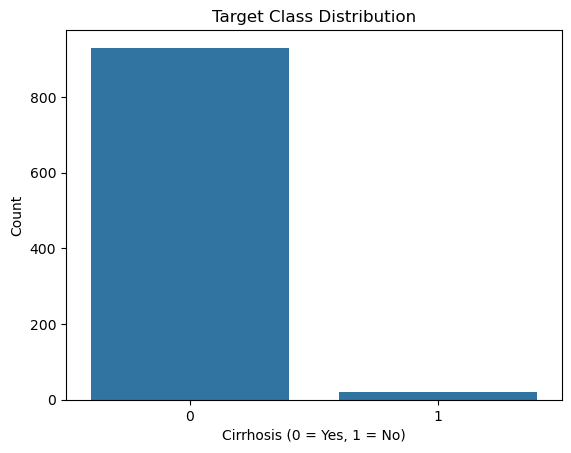

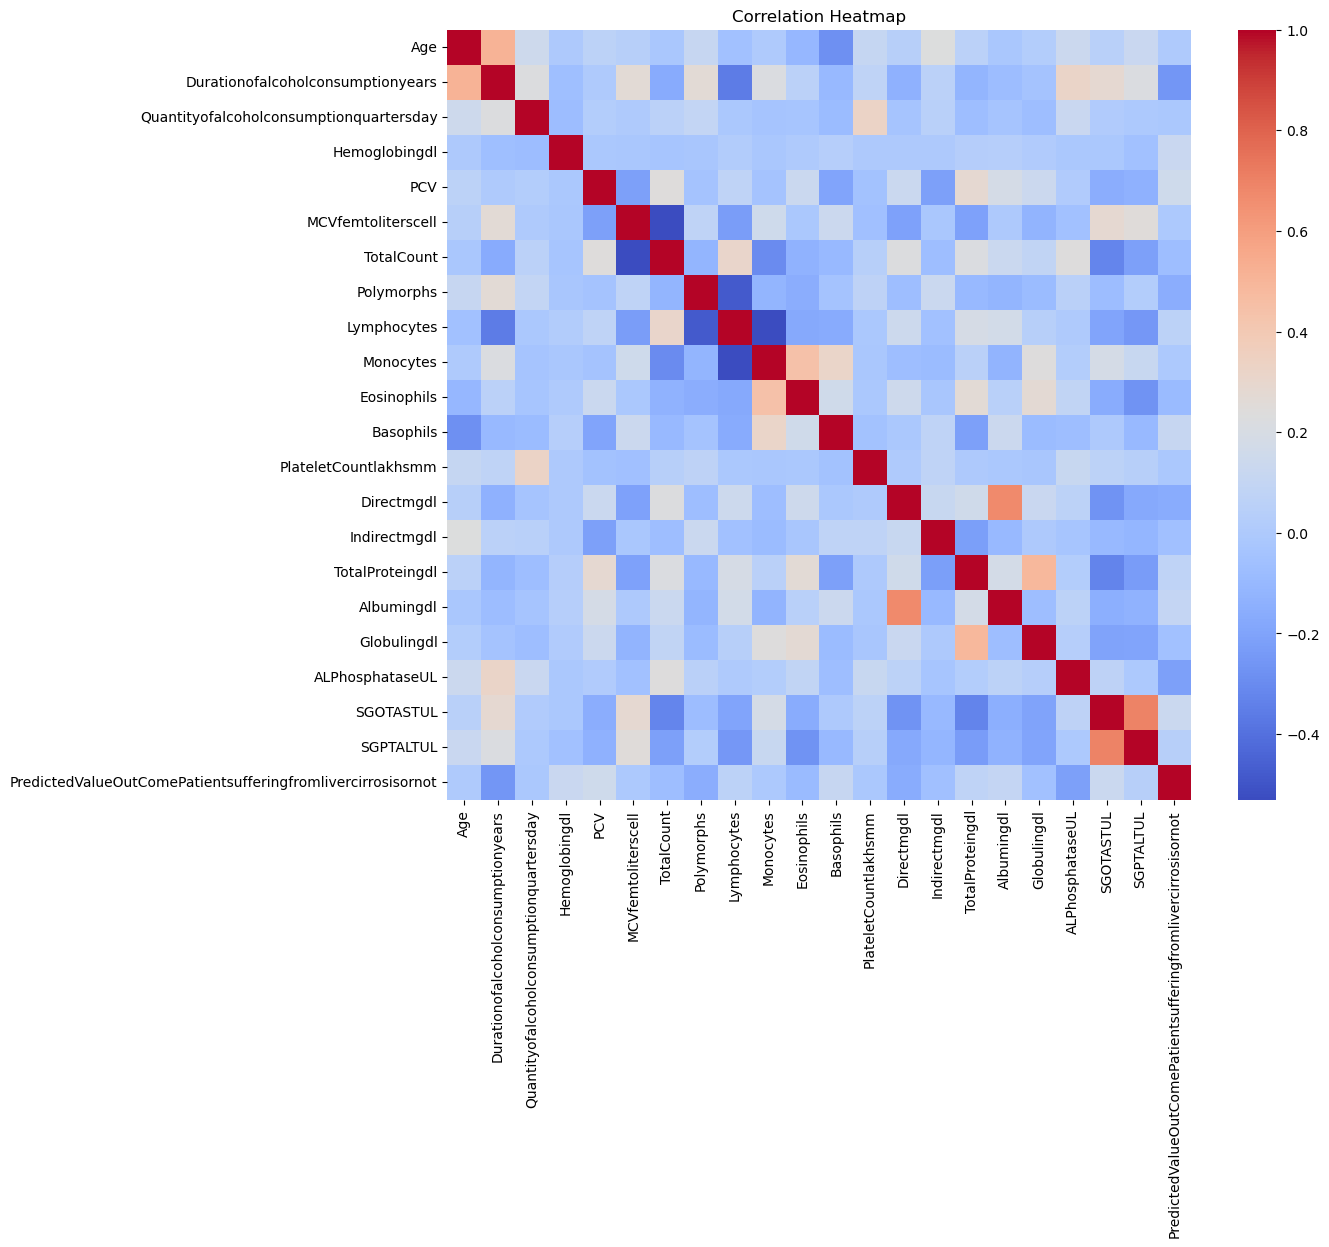

In [27]:
# Countplot for Target Variable
sns.countplot(x=Y)
plt.title("Target Class Distribution")
plt.xlabel("Cirrhosis (0 = Yes, 1 = No)")
plt.ylabel("Count")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, Y_train)

C:\Users\tejas\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:58:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [33]:
# Predictions
Y_pred = model.predict(X_test)

# Evaluation
print(" Model Evaluation:\n")
print("Accuracy       :", round(accuracy_score(Y_test, Y_pred) * 100, 2), "%")
print("Precision      :", round(precision_score(Y_test, Y_pred) * 100, 2), "%")
print("Recall         :", round(recall_score(Y_test, Y_pred) * 100, 2), "%")
print("F1 Score       :", round(f1_score(Y_test, Y_pred) * 100, 2), "%")

print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Model Evaluation:

Accuracy       : 100.0 %
Precision      : 100.0 %
Recall         : 100.0 %
F1 Score       : 100.0 %

Confusion Matrix:
 [[187   0]
 [  0   3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00         3

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



In [35]:
import joblib
joblib.dump(model, "liver_cirrhosis_model.pkl")

['liver_cirrhosis_model.pkl']

In [37]:
# Load model
model = joblib.load("liver_cirrhosis_model.pkl")
